<a href="https://colab.research.google.com/github/Shimondi/Battle-of-Neighbhorhoods-Capstone-Project/blob/master/Logistic%20Regression/Decision%20Tree/K%20nearest%20application%20on%20telemarketing%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Telemarketing


### Problem statement:

A money-free bank conducts a telemarketing campaign every three months to promote its term deposit product to customers. Unfortunately, the previous campaign's results did not fulfil their anticipations. The marketing director wants to start a new campaign again. To do so, they'll need a thorough analysis of previous campaigns' customer behavior. Following that, the bank can concentrate its marketing efforts on such customers. This would not only help the bank to better secure deposits, but it would also improve customer happiness by minimizing unwanted marketing for specific customers.

### Objective:

As a data scientist, you must analyse the data provided to identify which factors have a significant impact on customers' deposits and then develop a predictive model that can predict whether or not customers will subscribe to a term deposit. Figure out which customers did not deposit, even though we contacted them multiple times and took the necessary steps to ensure they did not even want to make a term deposit.


### Data Description

The data contains the different attributes of customers' term deposit. The detailed data dictionary is given below.


**Data Dictionary**

1. customer_id: unique customer ID 
2. email_id: email ID of a customer
3. first_name: first name of the customer
4. last_name: last name of the customer
5. age: age of a customer
6. job: type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)
7. marital_status: marital status (divorced, married, single, unknown) 
8. education: education (basic_4y,basic_6y,basic_9y,high_school,illiterate,professional_course,university_degree,unknown)
9. defaulter: has credit in default (yes,unknown,no)
10. home_loan: customer has home loan? (yes,no,unknown)
11. personal_loan: customer has personal loan? (yes,no,unknown)
12. communication_type: customer contact communication type (cellular, telephone)
13. last_contacted: customer last contacted month (mar,apr,may,jun,jul,aug,sep,oct,nov,dec)
14. day_of_week: last contact day of the week (mon,tue,wed,thu,fri)
15. duration: last contact duration in seconds
16. cc_contact_freq: number of contacts performed in the current campaign.
17. days_since_pc: number of days that passed by after the client was last contacted from a previous campaign.
18. pc_contact_freq: number of contacts performed before this campaign.
19. pc_outcome: previous campaign outcome (failure, nonexistent, success)
20. consumer_price_index: consumer price index 
(example: When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation)
21. euro_interbank_offer_rate:  Euro Interbank Offer Rate (It is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market)
22. subscribed: has the customer subscribed a term deposit? (yes, no)

#### Note: cc refers to current campaign,pc refers to previous campaign.
#### Note: If you stuck at somewhere , refer MLS session and videos.

## Importing necessary libraries and data

In [ ]:
#import necessarly libraries

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)


import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.stats import zscore


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Bank_Telemarketing.csv to Bank_Telemarketing.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Bank_Telemarketing.csv']))
df.head()

,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,...,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,...,may,mon,261,1,0,0,nonexistent,93.994,4.857,no
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,...,may,mon,149,1,0,0,nonexistent,93.994,4.857,no
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,...,may,mon,226,1,0,0,nonexistent,93.994,4.857,no
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,...,may,mon,151,1,0,0,nonexistent,93.994,4.857,no
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,...,may,mon,307,1,0,0,nonexistent,93.994,4.857,no


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Preparing data for modeling (Train test split)
- Dropping unnecessary columns
- Any other preprocessing steps (if needed)


**Note: Write the observations from the outliers columns but don't treat them because the data is accurate, but treating them may influence the model's performance.**

## Data Overview

- Observations
- Shape of the data
- Data types
- Description

In [ ]:

df.shape

(41183, 22)

The dataet ha 41183 rows and 22 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                41183 non-null  object 
 1   email_id                   41183 non-null  object 
 2   first_name                 41183 non-null  object 
 3   last_name                  41183 non-null  object 
 4   age                        41183 non-null  int64  
 5   job                        41183 non-null  object 
 6   marital_status             41183 non-null  object 
 7   education                  41183 non-null  object 
 8   defaulter                  41183 non-null  object 
 9   home_loan                  41183 non-null  object 
 10  personal_loan              41183 non-null  object 
 11  communication_type         41183 non-null  object 
 12  last_contacted             41183 non-null  object 
 13  day_of_week                41183 non-null  obj

In [ ]:
df.isnull().values.sum()

0

- No Null value in the datset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41183.0,40.026856,10.418794,18.000,32.000,38.000,47.000,98.000
duration,41183.0,258.265376,259.270273,0.000,102.000,180.000,319.000,4918.000
cc_contact_freq,41183.0,2.567637,2.770166,1.000,1.000,2.000,3.000,56.000
days_since_pc,41183.0,0.221014,1.348670,0.000,0.000,0.000,0.000,27.000
pc_contact_freq,41183.0,0.172765,0.494587,0.000,0.000,0.000,0.000,7.000
consumer_price_index,41183.0,93.575826,0.578689,92.201,93.075,93.749,93.994,94.767
euro_interbank_offer_rate,41183.0,3.621628,1.734283,0.634,1.344,4.857,4.961,5.045


In [ ]:
print(df['subscribed'].value_counts())
df['subscribed'].value_counts(normalize=True)


no     36545
yes     4638
Name: subscribed, dtype: int64


no     0.887381
yes    0.112619
Name: subscribed, dtype: float64

- of all the cutsomers 4638(~11%) of them have subscribed to deposit.

In [ ]:
#Changing yes/no to 1/0
df['subscribed'] = df['subscribed'].map({'yes':1, 'no': 0})

#1. Logistic Regression

## Building a Logistic Regression model

Droping columns and spiliting data

In [ ]:
X = df.drop(columns = ["customer_id", "email_id",	"first_name",	"last_name", "subscribed" ], axis=1)
Y = df["subscribed"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
#fiiting the LR model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

         Current function value: 0.211176
         Iterations: 35


In [ ]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28779
Method:                           MLE   Df Model:                           48
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3981
Time:                        03:11:46   Log-Likelihood:                -6087.8
converged:                      False   LL-Null:                       -10114.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0022      0.003      0.759      0.448      -0.003       0.008
duration                          0.0047   8.83e-05     52.988      0.000 

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    lg_model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    lg_model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = lg_model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909845,0.403281,0.660081,0.500672


In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(lr_model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    lr_model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = lr_model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

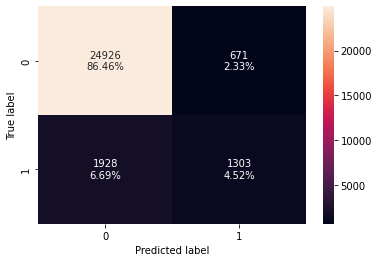

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# checking multicollinearity
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

age                               26.584998
duration                           2.022172
cc_contact_freq                    1.929380
days_since_pc                      2.358708
pc_contact_freq                    5.515135
consumer_price_index             120.365377
euro_interbank_offer_rate         15.671746
job_blue-collar                    3.113786
job_entrepreneur                   1.180385
job_housemaid                      1.218440
job_management                     1.350898
job_retired                        1.561476
job_self-employed                  1.163436
job_services                       1.564472
job_student                        1.208787
job_technician                     2.130562
job_unemployed                     1.130651
job_unknown                        1.090768
marital_status_married             6.513476
marital_status_single              3.997141
marital_status_unknown             1.025317
education_basic.6y                 1.6136

- Personal_loan_uknown and home_loan_unknown have high multicolinearity

In [ ]:
#dropping 'home_loan_unkown' column
X_train1 = X_train.drop("home_loan_unknown", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

age                               26.584998
duration                           2.022172
cc_contact_freq                    1.929380
days_since_pc                      2.358708
pc_contact_freq                    5.515135
consumer_price_index             120.365377
euro_interbank_offer_rate         15.671746
job_blue-collar                    3.113786
job_entrepreneur                   1.180385
job_housemaid                      1.218440
job_management                     1.350898
job_retired                        1.561476
job_self-employed                  1.163436
job_services                       1.564472
job_student                        1.208787
job_technician                     2.130562
job_unemployed                     1.130651
job_unknown                        1.090768
marital_status_married             6.513476
marital_status_single              3.997141
marital_status_unknown             1.025317
education_basic.6y                 1.6136

- age, consumer_price_index, pc_outcome_nonexistent, euro_interbank_offer have all multicolinearity greater than 10. 
-We can drop the columns one by one

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.211176
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.909845,0.403281,0.660081,0.500672


In [ ]:
X_train2 = X_train1.drop("consumer_price_index", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

age                              18.652588
duration                          2.005366
cc_contact_freq                   1.920088
days_since_pc                     2.357643
pc_contact_freq                   4.329162
euro_interbank_offer_rate        15.444159
job_blue-collar                   2.875705
job_entrepreneur                  1.172193
job_housemaid                     1.198554
job_management                    1.347417
job_retired                       1.559861
job_self-employed                 1.157026
job_services                      1.532405
job_student                       1.187789
job_technician                    2.094506
job_unemployed                    1.121444
job_unknown                       1.089590
marital_status_married            5.946708
marital_status_single             3.417993
marital_status_unknown            1.023034
education_basic.6y                1.524761
education_basic.9y                2.360899
education_high.scho

In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

         Current function value: 0.213554
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.909255,0.408852,0.651702,0.502472


In [ ]:
X_train3 = X_train2.drop("pc_outcome_nonexistent", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

age                              15.942357
duration                          1.994547
cc_contact_freq                   1.915808
days_since_pc                     2.351848
pc_contact_freq                   1.861922
euro_interbank_offer_rate        14.969522
job_blue-collar                   2.805552
job_entrepreneur                  1.170675
job_housemaid                     1.192152
job_management                    1.346571
job_retired                       1.559619
job_self-employed                 1.155712
job_services                      1.523201
job_student                       1.170400
job_technician                    2.085292
job_unemployed                    1.118519
job_unknown                       1.089251
marital_status_married            5.744801
marital_status_single             3.212794
marital_status_unknown            1.022592
education_basic.6y                1.498059
education_basic.9y                2.278691
education_high.scho

In [ ]:
X_train4 = X_train3.drop("euro_interbank_offer_rate", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

age                              15.710995
duration                          1.991603
cc_contact_freq                   1.910323
days_since_pc                     2.350102
pc_contact_freq                   1.766393
job_blue-collar                   2.797690
job_entrepreneur                  1.170120
job_housemaid                     1.191016
job_management                    1.346171
job_retired                       1.547072
job_self-employed                 1.155580
job_services                      1.520757
job_student                       1.166116
job_technician                    2.078348
job_unemployed                    1.118464
job_unknown                       1.089042
marital_status_married            5.725543
marital_status_single             3.210377
marital_status_unknown            1.022508
education_basic.6y                1.495076
education_basic.9y                2.268968
education_high.school             3.426113
education_illiterat

In [ ]:
X_train5 = X_train4.drop("age", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

duration                         1.967957
cc_contact_freq                  1.895798
days_since_pc                    2.349084
pc_contact_freq                  1.751896
job_blue-collar                  2.672849
job_entrepreneur                 1.154466
job_housemaid                    1.151021
job_management                   1.316498
job_retired                      1.219410
job_self-employed                1.146931
job_services                     1.505561
job_student                      1.161590
job_technician                   2.052185
job_unemployed                   1.112218
job_unknown                      1.082206
marital_status_married           5.536051
marital_status_single            3.207788
marital_status_unknown           1.022456
education_basic.6y               1.476011
education_basic.9y               2.214059
education_high.school            3.231160
education_illiterate             1.003973
education_professional.course    2.598733

No variables with multicolinearity greater than 10.

In [ ]:
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit()
print("Training performance:")
model_performance_classification_statsmodels(lg5, X_train5, y_train)


         Current function value: 0.234908
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.905058,0.360569,0.634532,0.459838


- The model has not improved even after we drop the variables with high multicolinearity.


In [ ]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28783
Method:                           MLE   Df Model:                           44
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                  0.3304
Time:                        03:15:36   Log-Likelihood:                -6771.9
converged:                      False   LL-Null:                       -10114.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
duration                          0.0041   8.06e-05     51.182      0.000       0.004       0.004
cc_contact_freq                  -0.1290      0.014     -8.958      0.000 

- we can improve the model by dropping variables with high P-value

In [ ]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train5.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train5[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['duration', 'cc_contact_freq', 'days_since_pc', 'pc_contact_freq', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'marital_status_married', 'marital_status_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'defaulter_unknown', 'home_loan_yes', 'personal_loan_yes', 'communication_type_telephone', 'last_contacted_aug', 'last_contacted_dec', 'last_contacted_jul', 'last_contacted_jun', 'last_contacted_mar', 'last_contacted_may', 'last_contacted_nov', 'last_contacted_oct', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pc_outcome_success']


In [ ]:
X_train6 = X_train5[selected_features]


In [ ]:
logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg6, X_train6, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.904745,0.357784,0.632731,0.457098


 - Even after dropping columns with high multicolinearity and columns with high P value, The model has not improved.

## Coefficient interpretations

In [ ]:

# converting coefficients to odds
odds = np.exp(lg6.params)
# finding the percentage change
perc_change_odds = (np.exp(lg6.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train6.columns).T

,duration,cc_contact_freq,days_since_pc,pc_contact_freq,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,marital_status_married,marital_status_single,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,defaulter_unknown,home_loan_yes,personal_loan_yes,communication_type_telephone,last_contacted_aug,last_contacted_dec,last_contacted_jul,last_contacted_jun,last_contacted_mar,last_contacted_may,last_contacted_nov,last_contacted_oct,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pc_outcome_success
Odds,1.004135,0.878973,1.041436,1.107699,0.382134,0.569996,0.472296,0.723668,0.628200,0.602762,1.447889,0.660588,0.580230,0.673075,0.493688,0.375548,0.322797,0.395880,0.374121,0.509134,0.472041,0.861495,0.839988,0.327149,0.304376,1.726403,0.227364,0.702245,2.511657,0.253093,0.231242,1.433512,0.657568,0.694725,0.804219,0.781619,8.248182
Change_odd%,0.413508,-12.102722,4.143567,10.769878,-61.786612,-43.000436,-52.770382,-27.633159,-37.180018,-39.723839,44.788937,-33.941188,-41.976975,-32.692471,-50.631173,-62.445191,-67.720314,-60.412036,-62.587863,-49.086646,-52.795928,-13.850534,-16.001219,-67.285111,-69.562423,72.640333,-77.263571,-29.775452,151.165698,-74.690652,-76.875797,43.351197,-34.243176,-30.527478,-19.578123,-21.838085,724.818234


 **duration**: Holding all other features constant a 1 unit change in call duration will increas the odds of a customer subscribing to deposit will increase by 0.41% 

**cc_contact_freq**: Increasing number of contacts made during the campaign  decreases the odds of a customer subscribing to deposit by 0.88 times or it  decreases by 12%

**job_blue_collar**: Having a blue collar job decreases the odd of a customer subscribing to deposit by 0.38 times or it decrease it by 61.8%

**pc_contact_freq**: Increasing number of contacts made before the campaign increase the odds of a customer subscribing to deposit by 1.1 times or it increases it by 10%




## Model performance evaluation

In [ ]:
#Model performance after dropping variables with high multicolineality and p-value
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg6, X_train6, y_train
)

print("Training performance when threshold=0.5:")
log_reg_model_train_perf



Training performance when threshold=0.5:


,Accuracy,Recall,Precision,F1
0,0.904745,0.357784,0.632731,0.457098


None


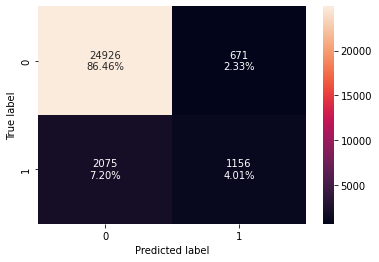

In [ ]:
print(confusion_matrix_statsmodels(lg6, X_train6, y_train))


-The model is not performing well on recall. 

#let's use precision-recall curve to have different threshold

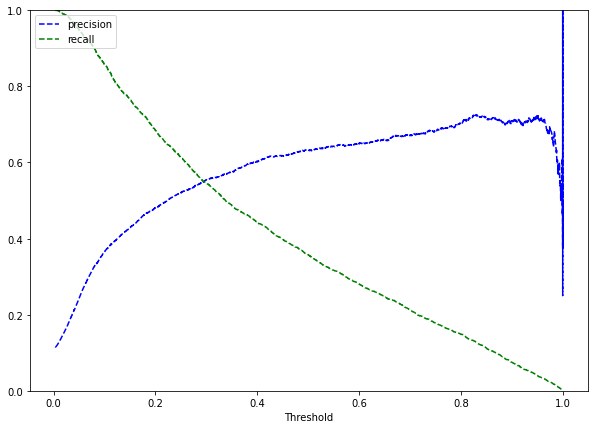

In [ ]:
y_scores = lg6.predict(X_train6)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

at threshold = 0.25, we get the optimum precision and recall

In [ ]:
optimal_threshold_curve = 0.25

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.893472,0.613742,0.521019,0.563592


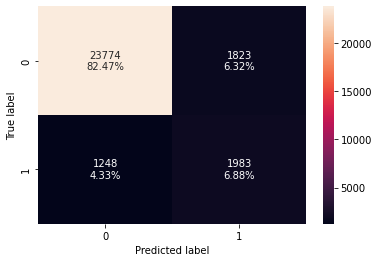

In [ ]:
confusion_matrix_statsmodels(lg6, X_train6, y_train, threshold=optimal_threshold_curve)

The F1 score and recall has improved albeit at the expesnse of accuracy and precision when we change the default threshold to 0.25

## Final Model Summary

In [ ]:

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.25 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.25 Threshold
Accuracy,0.904745,0.893472
Recall,0.357784,0.613742
Precision,0.632731,0.521019
F1,0.457098,0.563592


- changing the threshold from default (0.5) into the precision-curve threshold(0.25) has increased our model performance significantly

In [ ]:
X_test6 = X_test[list(X_train6.columns)]

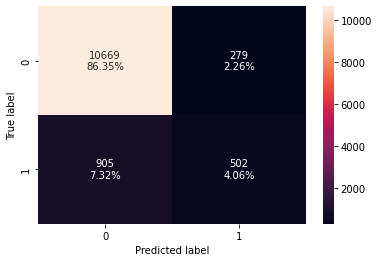

In [ ]:
confusion_matrix_statsmodels(lg6, X_test6, y_test)

##Model performance on test set

In [ ]:
#with deafault threshold
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg6, X_test6, y_test)


print("Test performance when threshold=0.5:")
log_reg_model_test_perf


Test performance when threshold=0.5:


,Accuracy,Recall,Precision,F1
0,0.904168,0.356787,0.642766,0.458867


In [ ]:
#with optimal threshold
log_reg_model_test_perf_threhold_curve = model_performance_classification_statsmodels(
    lg6, X_test6, y_test, threshold=optimal_threshold_curve)


print("Test performance when threshold=0.25:")
log_reg_model_test_perf_threhold_curve 

Test performance when threshold=0.25:


,Accuracy,Recall,Precision,F1
0,0.894132,0.615494,0.530312,0.569737


In [ ]:

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threhold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.25 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,0,0
Accuracy,0.904168,0.894132
Recall,0.356787,0.615494
Precision,0.642766,0.530312
F1,0.458867,0.569737


#2. Decision Tree

## Building a Decision Tree model

In [ ]:

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [ ]:
def confusion_matrix_sklearn(dt_model, predictors, target):
   
    y_pred = dt_model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    sns.set(rc={'figure.figsize':(6,4)})
    ax = sns.heatmap(cm, annot=labels, fmt="")
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")

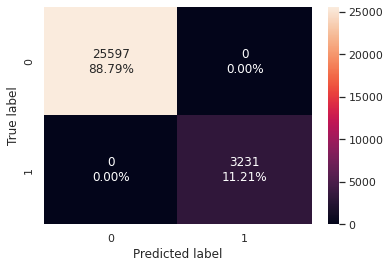

In [ ]:
confusion_matrix_sklearn(dTree, X_train, y_train)

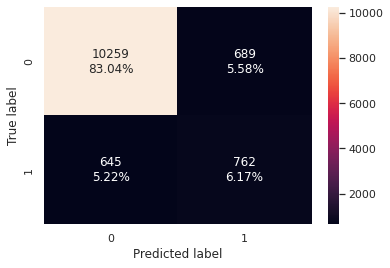

In [ ]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [ ]:
def get_recall_score(dt_model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = dt_model.predict(X_train)
    pred_test = dt_model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
get_recall_score(dTree)


Recall on training set :  1.0
Recall on test set :  0.5415778251599147


The model has perfect reacll and accuracy on the training set. That is not desirable as this is overfiiting. The model is not performing well on the test set.

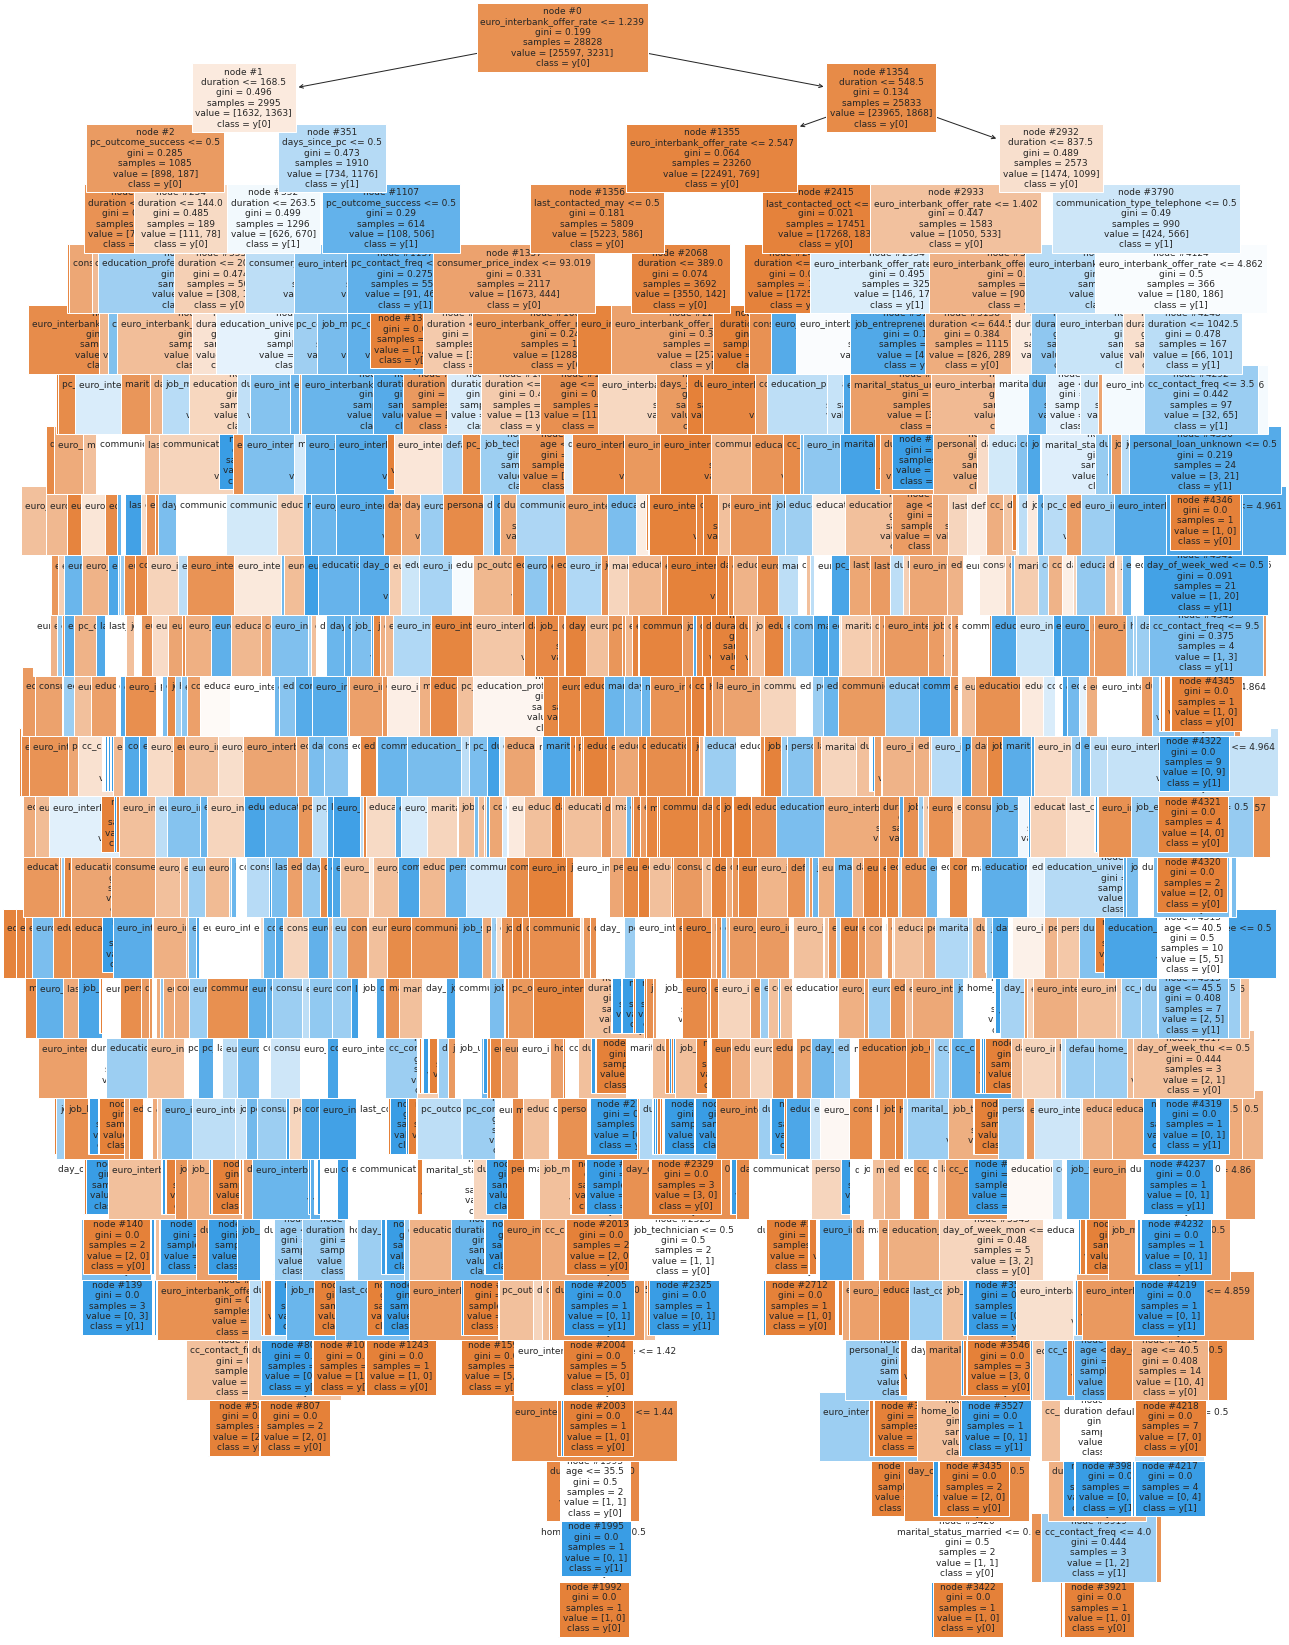

In [ ]:
feature_names = list(X.columns)
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
duration                       0.338985
euro_interbank_offer_rate      0.236339
age                            0.088517
cc_contact_freq                0.039056
days_since_pc                  0.022810
consumer_price_index           0.021725
last_contacted_may             0.016544
home_loan_yes                  0.012956
education_professional.course  0.011814
job_technician                 0.010808
personal_loan_yes              0.010115
pc_contact_freq                0.009795
education_high.school          0.009627
last_contacted_oct             0.009588
marital_status_single          0.009442
day_of_week_mon                0.008888
education_university.degree    0.008720
day_of_week_thu                0.008696
marital_status_married         0.008687
day_of_week_tue                0.008550
job_management                 0.008394
communication_type_telephone   0.008242
pc_outcome_success             0.006734
job_services                   0.006655


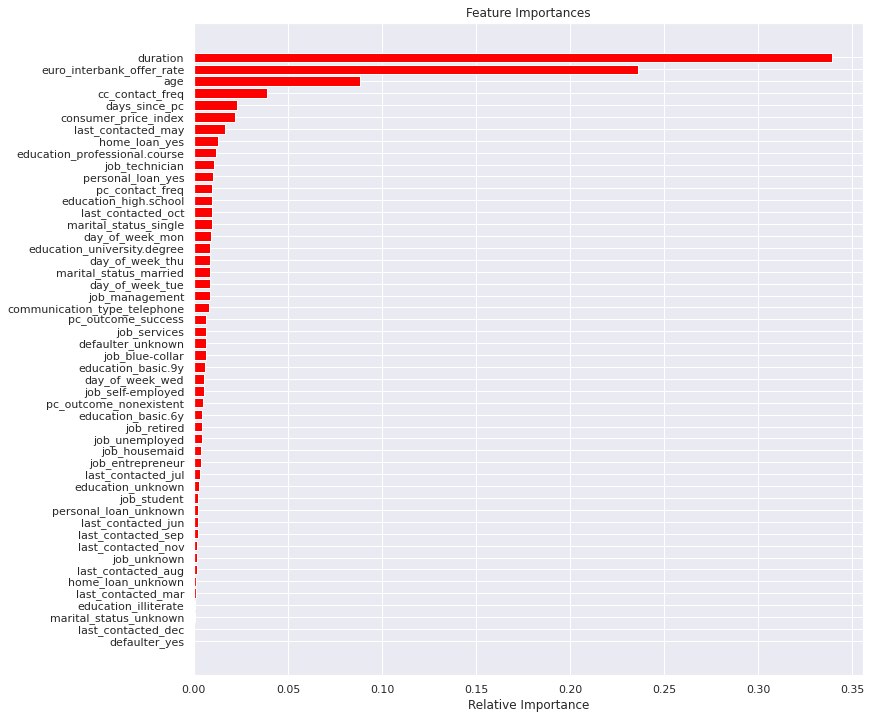

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune the tree?

Since the model is overfitting, we need the prune the tree.
First let's start with limiting the depth

In [ ]:

dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

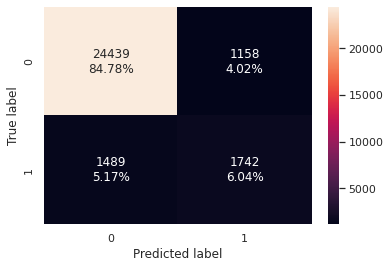

In [ ]:
confusion_matrix_sklearn(dTree1, X_train, y_train)

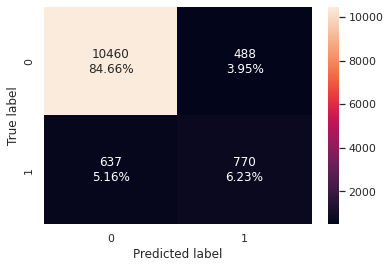

In [ ]:
confusion_matrix_sklearn(dTree1, X_test, y_test)

In [ ]:
get_recall_score(dTree1)


Recall on training set :  0.5391519653358093
Recall on test set :  0.5472636815920398


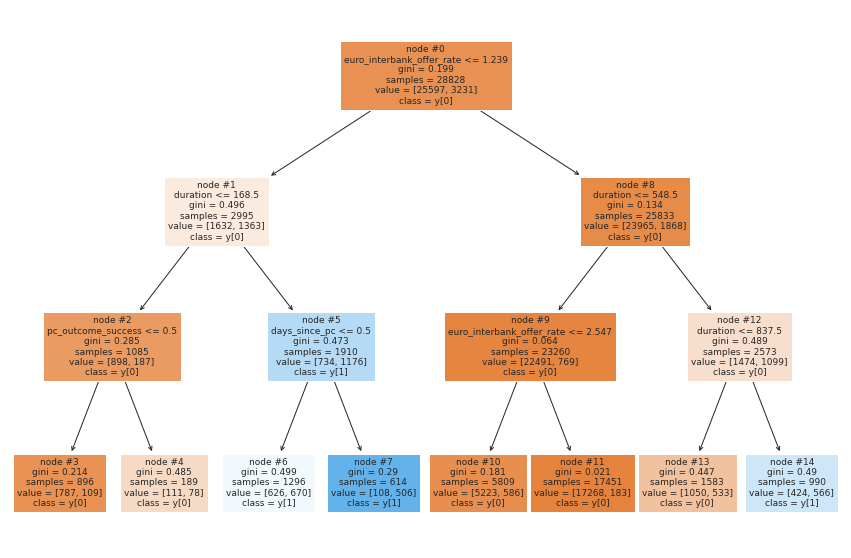

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

#Prunning



In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.027281852697797287


In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000983477494594296, random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000983477494594296, random_state=1)

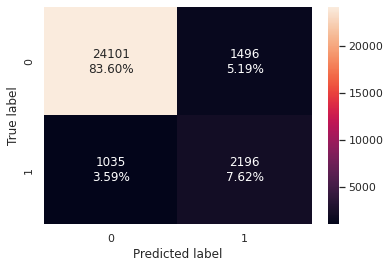

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

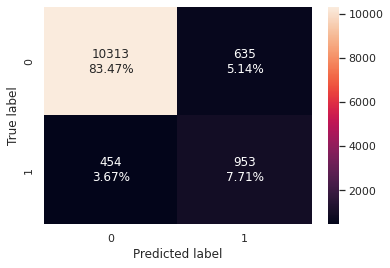

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
 get_recall_score(best_model)

Recall on training set :  0.6796657381615598
Recall on test set :  0.6773276474769012


## Model Performance Comparison and Conclusions

In [ ]:
different_models = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth', 'Decision tree with post-pruning'
                                        ], 'Train_Recall':[1, 0.54, 0.68], 'Test_Recall':[0.54, 0.55, 0.68]}) 
different_models


,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.54
1,Decision tree with restricted maximum depth,0.54,0.55
2,Decision tree with post-pruning,0.68,0.68


- Clearly the post prunning has improved our model significantly

#3. K-means Clustering

In [ ]:
#considering only the numerical columns
df_num = df[["age", "duration",	"cc_contact_freq", "days_since_pc", "pc_contact_freq", "consumer_price_index", "euro_interbank_offer_rate" ]]
df_num.head()

,age,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate
0,56,261,1,0,0,93.994,4.857
1,57,149,1,0,0,93.994,4.857
2,37,226,1,0,0,93.994,4.857
3,40,151,1,0,0,93.994,4.857
4,56,307,1,0,0,93.994,4.857


In [ ]:
#Sacling using zscore
scaled_df_num = df_num.apply(zscore)
scaled_df_num.head()

,age,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate
0,1.533127,0.010548,-0.565907,-0.163877,-0.349317,0.722632,0.712333
1,1.629109,-0.421439,-0.565907,-0.163877,-0.349317,0.722632,0.712333
2,-0.290522,-0.124448,-0.565907,-0.163877,-0.349317,0.722632,0.712333
3,-0.002578,-0.413725,-0.565907,-0.163877,-0.349317,0.722632,0.712333
4,1.533127,0.187971,-0.565907,-0.163877,-0.349317,0.722632,0.712333


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

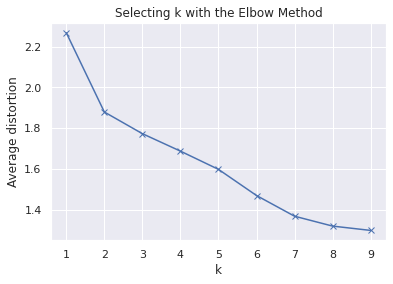

In [ ]:
#Finding optimal no. of clusters using the elbow method

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_df_num)
    prediction=model.predict(scaled_df_num)
    meanDistortions.append(sum(np.min(cdist(scaled_df_num, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df_num.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

For n_clusters = 2, silhouette score is 0.3467721228895164
For n_clusters = 3, silhouette score is 0.34660768792589064
For n_clusters = 4, silhouette score is 0.35945820012523055
For n_clusters = 5, silhouette score is 0.35892435902489433
For n_clusters = 6, silhouette score is 0.3625573991200395
For n_clusters = 7, silhouette score is 0.2818775937914427
For n_clusters = 8, silhouette score is 0.2797786062528993
For n_clusters = 9, silhouette score is 0.28333774344370427


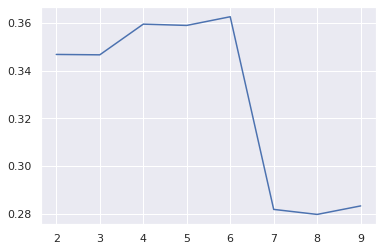

In [ ]:
#finding optimal number of clusters using silhoutte score
from sklearn.metrics import silhouette_score

sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((scaled_df_num))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df_num, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- From the silhouette score, 6 is the optimal number

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_num)

KMeans(n_clusters=6, random_state=0)

In [ ]:
# Let us first start with K = 5
k2_model=KMeans(6)
k2_model.fit(scaled_df_num)
prediction=k2_model.predict(scaled_df_num)

#Append the prediction 
df["segment"] = prediction
scaled_df_num["segment"] = prediction
print("Segments : \n")
df.head()

Segments : 



,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed,segment
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,0,4
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,0,4
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,0,4
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,0,4
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,0,4


In [ ]:
print(df.groupby("segment")["subscribed"].value_counts())
df.groupby("segment")["subscribed"].value_counts(normalize=True)

segment  subscribed
0        0              1584
         1              1296
1        0              1525
         1                39
2        1               617
         0               331
3        0              6529
         1              1526
4        0             22837
         1               338
5        0              3739
         1               822
Name: subscribed, dtype: int64


segment  subscribed
0        0             0.550000
         1             0.450000
1        0             0.975064
         1             0.024936
2        1             0.650844
         0             0.349156
3        0             0.810552
         1             0.189448
4        0             0.985415
         1             0.014585
5        0             0.819776
         1             0.180224
Name: subscribed, dtype: float64

- percentage wise, segment 4 has most subscribers followed by segment 0

## Cluster profiles

In [ ]:
cluster_profile = df.groupby("segment").mean()
cluster_profile

,age,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate,subscribed
segment,,,,,,,,
0,39.629514,942.812847,2.363194,0.012500,0.037153,93.725882,4.230161,0.450000
1,40.488491,152.761509,12.927110,0.000000,0.003836,93.924328,4.789892,0.024936
2,41.606540,339.658228,1.872363,7.885021,1.830169,93.531159,0.935443,0.650844
3,39.187461,229.696586,2.101800,0.000000,0.000000,92.939520,1.213981,0.189448
4,40.231586,192.614153,2.204444,0.000000,0.000086,93.860021,4.812926,0.014585
5,40.233282,229.311116,1.957027,0.348827,1.154352,93.050579,1.594005,0.180224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7cf395cd0>,
      dtype=object)

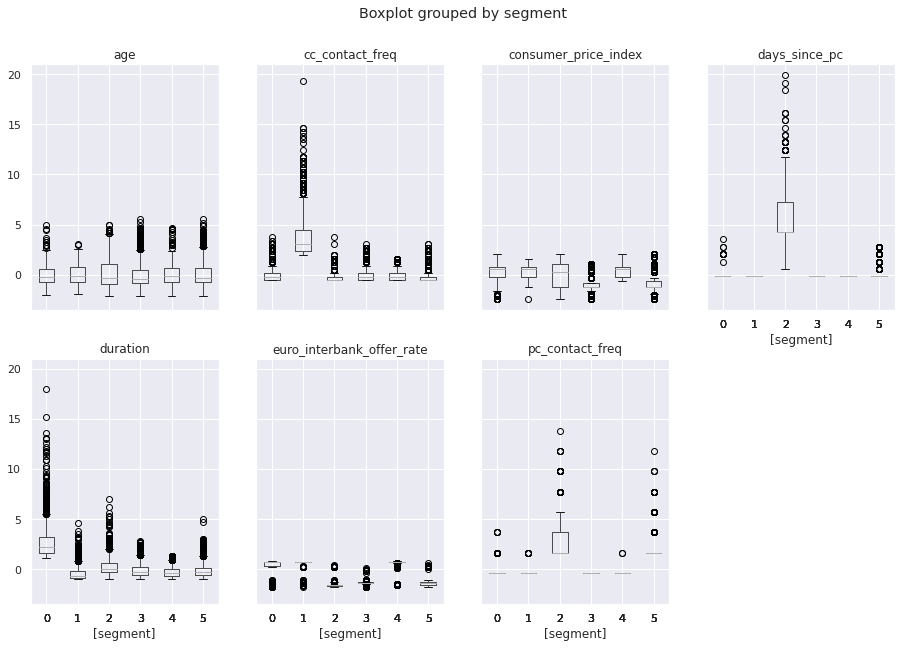

In [ ]:
scaled_df_num.boxplot(by='segment', layout = (2,4),figsize=(15,10))

 ## Actionable Insights and Recommendations
 
 - The most profitable customers lie in segment 0 and 2 as 45% and 65% of the customers in those segment respiectievly subssribed to term deposit.

 - Those two segments are characterized by customers who were contacted more frequently before the campaign started but has not been contacted for long after the new campaign started. 

 - Those segments also include customers with high duration in the last call.

 - only 1.5% and 2.4% of those in segment 4 and 1 respiectively subscribe to deposit. Those are the least profitable segments and those are customers who were contacted frequently after the campaign started


##Recomndations

- Trying to contact frequently after the campaign started doesn't help getting customers subscribing to deposit. It is not recomonnede the bank tries to contact frequently customers.

- The bank should foucs on customers who were contacted frequently before the campaign started but not coummnicated for long time. Those are loyal customers.

- Customers who spend more time on the last call have  more tendency of subscribing as they may get more information. It is highly recommonded the bank takes time in explaining its service when it calls its customers

- 

In [ ]:
%%shell
jupyter nbconvert --to html /content/Shibeshi_Asgedom_p5.ipynb

[NbConvertApp] Converting notebook /content/Shibeshi_Asgedom_p5.ipynb to html
[NbConvertApp] Writing 1872666 bytes to /content/Shibeshi_Asgedom_p5.html
